
# <p style="text-align: center;">MIS 382N: ADVANCED PREDICTIVE MODELING - MSBA</p>
# <p style="text-align: center;">Assignment 2</p>
## <p style="text-align: center;">Total points: 85 </p>
## <p style="text-align: center;">Due: Tuesday, October 2nd, submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  **Please include the name and UTEID for both students on all submitted files (including this notebook).**

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Question 0. Bias-variance (15pts)
Use the following code to read in a small set of data and divide it into training and testing sets. Inputs are x; outputs are y.

In [2]:
import numpy as np

data_train = np.genfromtxt('data_q0_train.csv', delimiter=',')
x_train = data_train[:,0].reshape(-1, 1)
y_train = data_train[:,1].reshape(-1, 1)

data_test = np.genfromtxt('data_q0_test.csv', delimiter=',')
x_test = data_test[:,0].reshape(-1, 1)
y_test = data_test[:,1].reshape(-1, 1)

We want to build a model that can predict y for unknown inputs x.

(a) (5pts) Fit a linear model to the training data, and report mean squared error on the test data. Plot the data, fitted model, and predictions, clearly denoting the training, testing, and predicted points.

In [3]:
# Fit linear model to training data
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression() 
lin_reg.fit(x_train, y_train)

# Mean squared error on test data
from sklearn.metrics import mean_squared_error 

# Predictions on the test/validation data
y_pred_test = lin_reg.predict(x_test)

MSE_test = mean_squared_error(y_test, y_pred_test)
print ('MSE on test data: ', MSE_test)

MSE on test data:  6455.708453830031


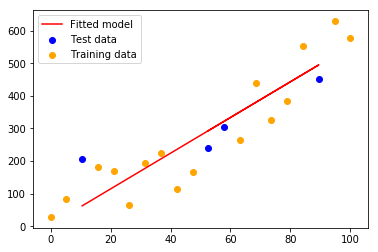

In [4]:
# Plot data, fitted model, and predictions 
import matplotlib.pyplot as plt 
%matplotlib inline 

plt.scatter(x_test, y_test, color = 'blue', label = "Test data")
plt.scatter(x_train, y_train, color = 'orange', label = "Training data")
plt.plot(x_test, y_pred_test, color = 'red', label = "Fitted model")
    
plt.legend()

plt.show()

(b) (5pts) Fit polynomial models of degrees 1,2,3 and 5 to the training data, and report mean squared error for both models. Plot the data, the fitted models, and the predicted outputs.

In [5]:
# Fit polynomial models of degrees 1, 2, 3, and 5 to the training data 

from sklearn.preprocessing import PolynomialFeatures

y_pred_poly_train = []
y_pred_poly_test = []
MSE_poly = []

def poly_models(d):
    poly_features = PolynomialFeatures(degree=d)
    x_train_poly = poly_features.fit_transform(x_train)
    x_test_poly = poly_features.fit_transform(x_test)
    lin_reg.fit(x_train_poly,y_train)
    y_pred_poly_train.append(lin_reg.predict(x_train_poly))
    y_pred_poly_test.append(lin_reg.predict(x_test_poly))
    MSE_poly.append(mean_squared_error(y_test, lin_reg.predict(x_test_poly)))
    return MSE_poly 

# MSE of polynomial models 
MSE_poly1 = poly_models(1) 
MSE_poly2 = poly_models(2) 
MSE_poly3 = poly_models(3) 
MSE_poly5 = poly_models(5)
                    
print ('MSE on the test data for polynomial model of degree 1 is: ', MSE_poly[0])  
print ('MSE on the test data for polynomial model of degree 2 is: ', MSE_poly[1])
print ('MSE on the test data for polynomial model of degree 3 is: ', MSE_poly[2])
print ('MSE on the test data for polynomial model of degree 5 is: ', MSE_poly[3])

MSE on the test data for polynomial model of degree 1 is:  6455.70845383002
MSE on the test data for polynomial model of degree 2 is:  4683.309906329018
MSE on the test data for polynomial model of degree 3 is:  4602.202716053174
MSE on the test data for polynomial model of degree 5 is:  6599.133603518122


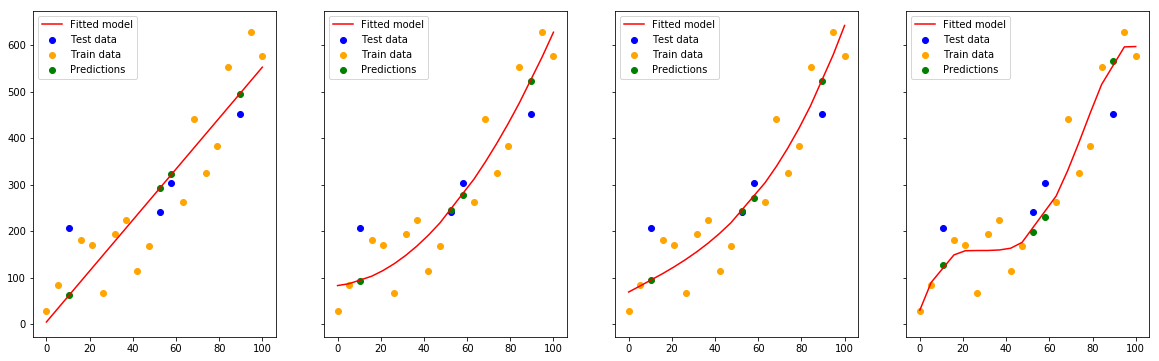

In [6]:
# Plot the data, the fitted models, and the predicted outputs
fig, axes = plt.subplots(nrows =1, ncols = 4, figsize = (20,6), sharey = True)

for i in range(4):
    axes[i].scatter(x_test, y_test, color = 'blue', label = 'Test data')
    axes[i].scatter(x_train,y_train, color = 'orange', label = 'Train data')
    axes[i].scatter(x_test, y_pred_poly_test[i], color = 'green', label = 'Predictions')
    axes[i].plot(sorted(x_train),sorted(y_pred_poly_train[i]), color = 'red', label = "Fitted model")
    
    axes[i].legend()
 
plt.show()

(c) (5pts) Which model performed the best? Explain using the bias-variance tradeoff.

The polynomial model with degree of 3 performned the best (lowest MSE). Expected loss is definied as = (bias)^2 + variance + noise. As we increase the polynomial degree, the complexity increases, thus increasing variance faster than the bias is decreasing - hence why MSE is increasing again for polynomial of degree 5 (overfitting the model). For the model with degree of 3, the tradeoff between model complexity (higher variance, lower bias) is optimal, relative to the models observed because biased has decreased more than variance has increased.  

# Question 1. Data Exploration (20pts)
Use the following code to import the dataset.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#read the data
data = pd.read_csv('data_q1.csv', index_col=0)

The columns are:
  * TV: advertising dollars spent on TV for a single product (in thousands of dollars)
  * Radio: advertising dollars spent on Radio
  * Newspaper: advertising dollars spent on Newspaper
  * Sales (dependent variable): sales of a single product in a given market (in thousands of widgets)

We are interested in predicting sales based on the first three "feature" variables (TV, Radio and Newspaper).

(a) (1pts) Print the shape (number of rows and columns) of the data matrix , and show the first 5 rows.

(b) (4pts) Generate box-plots for each of the four columns and identify the cutoff values for outliers.

(c) (4pts) Visualize the relationship between the features and the response variable (Sales) using scatterplots. Comment on the fits.

(d) (4pts) Fit a simple linear regression of 'Sales' on 'TV'. What is the regression coefficient for 'TV'? What is its interpretation?

Now split the data randomly into a training and test set (keep one third of the data for test), using train_test_split from sklearn. Use test_size as 0.33 and random_state as 42.

(e) (4pts) Fit an MLR on all the feature variables using the training data and evaluate the trained model on the test data using root mean squared error. (Sales is the dependent variable)

(f) (2pts) Report the MSE obtained on train data. How much does this increase when you score your model on test data?

(g) (1pts) Report the coefficients obtained by your model.

# Question 2. Regression (25pts)

Use the following dataset for this question. Split the dataset into train and test set(already done for you.)


In [8]:
import pandas as pd
from sklearn import datasets
diabetes = datasets.load_diabetes()

X = diabetes.data
Y = diabetes.target

In [9]:
# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.33, random_state=10) 

a) (2 points) Fit an MLR, using ordinary least squares, on all the feature variables using the training data. Report the RMSE obtained on both X_train and X_test. How much does this increase when you score your model on X_test?

In [10]:
# Fit linear model to training data
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression() 
lin_reg.fit(X_train, Y_train)

# RMSE on X_train
from sklearn.metrics import mean_squared_error
from math import sqrt

predictions_train = lin_reg.predict(X_train)
RMSE_train = sqrt(mean_squared_error(Y_train, predictions_train))
print('RMSE train: ', RMSE_train)

# RMSE on X_test
predictions_test = lin_reg.predict(X_test)
RMSE_test = sqrt(mean_squared_error(Y_test, predictions_test))
print('RMSE test: ', RMSE_test)

difference = RMSE_test - RMSE_train
print('RMSE increases by', difference, 'when we score our model on X_test')

RMSE train:  52.007732294217874
RMSE test:  57.428059772853565
RMSE increases by 5.420327478635691 when we score our model on X_test


b)  (3 points) Now fit the regression model using Huber loss.  You can use the [sklearn package](  http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.HuberRegressor.html).  Set regularization parameter alpha to 0.0 and all other parameters as default.
Report RMSE obtained on both X_train and X_test.

In [11]:
from sklearn.linear_model import HuberRegressor
huber = HuberRegressor(alpha = 0.0)
huber.fit(X_train, Y_train)

# RMSE on X_train
h_predictions_train = huber.predict(X_train)
h_RMSE_train = sqrt(mean_squared_error(Y_train, h_predictions_train))
print('RMSE train (Huber): ', h_RMSE_train)

# RMSE on X_test
h_predictions_test = huber.predict(X_test)
h_RMSE_test = sqrt(mean_squared_error(Y_test, h_predictions_test))
print('RMSE test (Huber): ', h_RMSE_test)

RMSE train (Huber):  52.16357035670655
RMSE test (Huber):  57.150050095483834


**Now we will introduce outlier in the training set and train our model to see how the model performs. (Code provided)**

In [12]:
y_train_outliers = np.copy(Y_train)
y_train_outliers[0] = 5000.0

c) (2 points ) Fit the MLR model on X_train and y_train_outliers and calculate the RMSE on train and test set.

In [13]:
# Fit linear model to training data (with outlier)
lin_reg.fit(X_train, y_train_outliers)

# RMSE on X_train (with outlier)
predictions_train_out = lin_reg.predict(X_train)
RMSE_train_out = sqrt(mean_squared_error(y_train_outliers, predictions_train_out))
print('RMSE train (with outlier): ', RMSE_train_out)

# RMSE on X_test
predictions_test2 = lin_reg.predict(X_test)
RMSE_test2 = sqrt(mean_squared_error(Y_test, predictions_test2))
print('RMSE test: ', RMSE_test2)

RMSE train (with outlier):  286.26410306560086
RMSE test:  82.21820407137498


d) (3 points) Fit the regression model with Huber loss on X_train and y_train_outier. Calculate the RMSE on train and test set. Compare the RMSE of both the models.

In [14]:
huber.fit(X_train, y_train_outliers)

# RMSE on X_train
h_predictions_train2 = huber.predict(X_train)
h_RMSE_train2 = sqrt(mean_squared_error(y_train_outliers, h_predictions_train2))
print('RMSE train (Huber - with outlier): ', h_RMSE_train2)

# RMSE on X_test
h_predictions_test2 = huber.predict(X_test)
h_RMSE_test2 = sqrt(mean_squared_error(Y_test, h_predictions_test2))
print('RMSE test (Huber): ', h_RMSE_test2)

RMSE train (Huber - with outlier):  290.22238334765404
RMSE test (Huber):  57.56638708274611


e) (5 points) Calaculate the residuals on the test set for both the models obtained in (c) and (d). Plot the scatter plot of residual vs fitted value for both the models. What do you observe? Which model looks better?

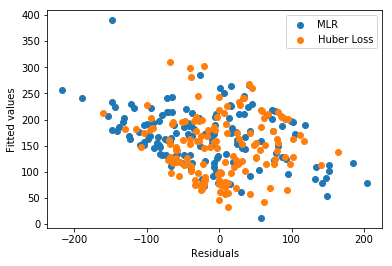

In [24]:
# Residuals for c
residuals_c = Y_test - predictions_test2

# Residuals for d (Huber loss)
residuals_d = Y_test - h_predictions_test2

plt.scatter(residuals_c, predictions_test2, label = 'MLR')
plt.scatter(residuals_d, h_predictions_test2, label = 'Huber Loss')
plt.xlabel("Residuals")
plt.ylabel("Fitted values")

plt.legend()
plt.show()

The Huber loss model looks better because it is less influenced by the presence of outliers. It makes sure that the loss fuction/residuals are not heavily influenced by outliers while not completely ignoring their effect. The residuals in the model with Huber Loss are less scattered compared to the normal MLR. 

Now we will do feature selection. The features of X matrix are named as x1,x2,.... . We have created a list feature_name which stores the feature name (Code provided). So x1 means the first column of X, x2 means the second column of X and so on.

In [16]:
feature_name = ['x'+str(i) for i in range(1,11)]
print(feature_name)

['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10']


f) (5 points ) Backward Selection: Find the three most significant factors using backward feature selection. You may find this link to be helpful: http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html. Use X_train and Y_train for your model.

In [30]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

estimator = SVR(kernel="linear")
selector = RFE(estimator, 3, step=1)
selector = selector.fit(X_train, Y_train)
# selector.support_ 
selector.ranking_

array([5, 8, 1, 1, 6, 7, 2, 3, 1, 4])

g) (5 points) Forward Selection: Find the three most significant feature using forward selection. Check if it is same as the ones you got in part (f). Use X_train and Y_train for your model. Hint : Use a for loop to implement forward feature selection

# Question 3. Sampling (5pts)

A recent survey estimated that $30\%$ of all Europeans aged 20 to 22 have driven under the influence of drugs or alcohol, based on a simple "Yes or No" question. A similar survey is being planned for Americans. The survey designers want the  $90\%$ confidence interval to have a margin of error of at most $\pm0.09$.

(a) (2pts) Find the necessary sample size needed to conduct this survey assuming that the expected percentage of "yes" answers will be very close to that obtained from the European survey?

(b) (2pts) Suppose the tolerance level was kept the same but the confidence level needs to increase to $95\%$. What is the required sample size for this new specification?

(c) (1pts) If one does not know where the true "$p$" may lie, one can conservatively conduct a survey assuming the worst case (in terms of required minimum sample size)  scenario of  $p = 0.5$. Redo part (b) for this "worst case" scenario.

## Answer

# Question 4. Principal Component Analysis (10pts)

Use the following code to read in data of US Imports.

In [17]:
import pandas as pd

df = pd.read_csv('data_q4.csv', index_col=0)
df.head()

,"Agricultural machinery, equipment","Alcoholic beverages, excluding wine","Apparel, household goods - cotton","Apparel, household goods - wool","Apparel, textiles, nonwool or cotton","Apparel,household goods-nontextile","Artwork, antiques, stamps, etc.",Automotive tires and tubes,Bakery products,Bauxite and aluminum,...,Toiletries and cosmetics,"Toys, games, and sporting goods","Trucks, buses, and special purpose vehicles","U.S. goods returned, and reimports",Vegetables,"Vessels, except scrap","Wine, beer, and related products","Wood, glass, plastic","Wool, silk, etc.",Zinc
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,3105.0,0.0,10739.0,7314.0,11942.0,2720.0,402303.0,0.0,12081.0,0.0,...,0.0,0.0,0.0,6156613.0,25873.0,0.0,61741.0,8474.0,3350.0,0.0
Albania,0.0,34741.0,2752171.0,50838.0,1298224.0,889107.0,286011.0,0.0,0.0,182556.0,...,4446.0,0.0,0.0,66682.0,519964.0,0.0,14112.0,0.0,0.0,0.0
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,20217.0,0.0,0.0,0.0,...,22947.0,0.0,0.0,29474254.0,0.0,0.0,0.0,0.0,0.0,0.0
Andorra,0.0,0.0,351.0,0.0,0.0,3683.0,0.0,0.0,0.0,4741.0,...,0.0,0.0,0.0,67589.0,0.0,0.0,0.0,0.0,0.0,0.0
Angola,0.0,24505.0,0.0,0.0,0.0,0.0,6412.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2992.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
from sklearn.preprocessing import StandardScaler
stdScaler = StandardScaler()
df_scaled = stdScaler.fit_transform(df)

(a) (3pts) Find the top two principal components from this dataset, and make a scatter plot with the first component as the x-axis and the second as the y-axis. You may find the sklearn PCA package to be useful.

(b) (2pts) Find the names of the six countries with the highest first component (these should be clear outliers).

(c) (3pts) Create i) a scree plot depicting the proportion of variance and ii) a cumulative proportion of variance explained by the principal components of the data (X matrix).  If you are using sklearn's PCA implementation, you may use the output attribute *explained variance ratio*.

(d) (2pts) How many principal components are required to explain cumulative variance of 30%, 60%, and 90%, respectively?

# Question 5. PCA (conceptual) (10pts)

(a) (5pts) Give two reasons why we might want to use PCA.

(b) (5pts) If we approach PCA using eigenvalue decomposition on the covariance matrix, explain what the eigenvectors and eigenvalues represent.